In [25]:
import numpy as np
import matplotlib.pyplot as plt
import colorsys
%matplotlib inline
import matplotlib as mpl

In [45]:
def tempfunc2cmap(tempfunc,Tmin=-15,Tmax=115, N=100):
    r,g,b = [],[],[]
    T = np.linspace(Tmin,Tmax,N)
    Tn = np.linspace(0,1.,N)
    for t in T:
        tmp = tempfunc(t)
        r.append(tmp[0])
        g.append(tmp[1])
        b.append(tmp[2])
    rtup = [(n,x,x) for x,n in zip(r,Tn)]
    gtup = [(n,x,x) for x,n in zip(g,Tn)]
    btup = [(n,x,x) for x,n in zip(b,Tn)]
    cdict = {'red':rtup,'green':gtup,'blue':btup}
    tmap = mpl.colors.LinearSegmentedColormap('tempmap',cdict)
    return tmap

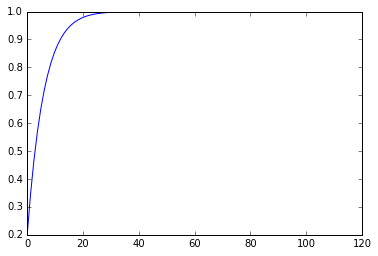

In [2]:
T = np.linspace(0,120,100)
Tmin = 0
Tmax = 120
Hmin = 0.9
Hmax = 0.
Smin = .2
Smax = 1.
DT = Tmax-Tmin
DH = Hmax-Hmin
DS = Smax-Smin
x = (T-Tmin)/DT
H = DH/DT*T + Hmin
S = DS*(1-(1-x)**20)+Smin
V = 1.
plt.plot(T, S)

(-10, 130)

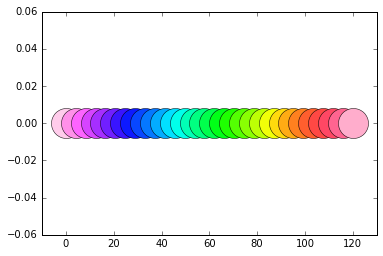

In [3]:
def temp_to_rgb(T):
    ''' Convert temperature in fahrenheit to color scale for maps
    input:
        T: temperature in fahrenheit (0 to 120 bounds of colors)
    output:
        color in (r,g,b) tuple
    '''
    Tmin = 0
    Tmax = 120
    Hmin = 0.9
    Hmax = -.1
    Smin = .2
    Smax = 1.
    if T > Tmax:
        T = Tmax
    elif T<Tmin:
        T = Tmin
    DT = Tmax-Tmin
    DH = Hmax-Hmin
    DS = Smax-Smin
    x = (T-Tmin)/DT
    H = DH/DT*T + Hmin
    xexp = 10
    S = DS*(1-(1-x)**xexp-x**xexp)+Smin
    V = 1.
    rgb = colorsys.hsv_to_rgb(H,S,V)
    return rgb

T = np.linspace(0,120,30)
for t in T:
    color = temp_to_rgb(t)
    plt.plot(t,0,'o',markersize=30, markerfacecolor=color)
plt.xlim(-10,130)

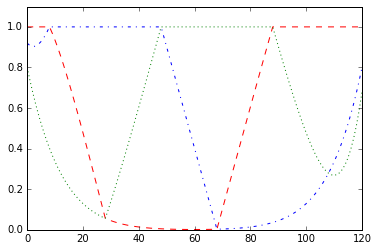

In [33]:
r,g,b = [],[],[]
Tmin = 0
Tmax = 120
N = 100
T = np.linspace(Tmin,Tmax,N)
Tn = np.linspace(0,1.,N)
for t in T:
    rt,gt,bt = temp_to_rgb(t)
    r.append(rt)
    g.append(gt)
    b.append(bt)
plt.plot(T,r,'--r')
plt.plot(T,g,':g')
plt.plot(T,b,'-.b')
plt.ylim(0,1.1)
rtup = [(n,x,x) for x,n in zip(r,Tn)]
gtup = [(n,x,x) for x,n in zip(g,Tn)]
btup = [(n,x,x) for x,n in zip(b,Tn)]
cdict = {'red':rtup,'green':gtup,'blue':btup}

In [34]:
tmap = mpl.colors.LinearSegmentedColormap('tempmap',cdict)

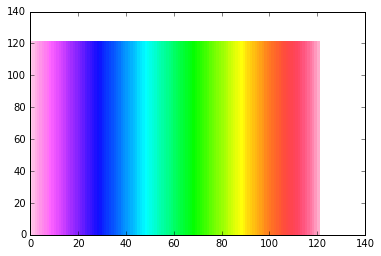

In [36]:
surf = (np.ones((len(Tn),len(Tn)))*Tn[:,None]).T
plt.pcolormesh(surf, cmap=tmap)

# NIPY-Based colorscale

In [48]:
def temp2color(temperature, exp=0.7):
    tmp = (max(temperature+10,0)/120)**exp
    return mpl.colorbar.cm.nipy_spectral(tmp)

In [49]:
npycmp = tempfunc2cmap(temp2color)

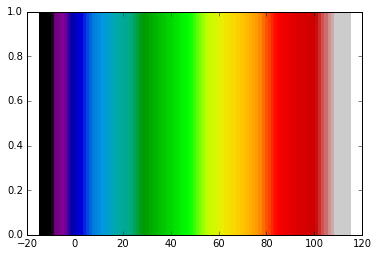

In [51]:
Tn = np.linspace(0,1,100)
T = np.linspace(-15,115,100)
surf = (np.ones((len(Tn),len(Tn)))*Tn[:,None]).T
plt.pcolormesh(T,Tn,surf, cmap=npycmp)

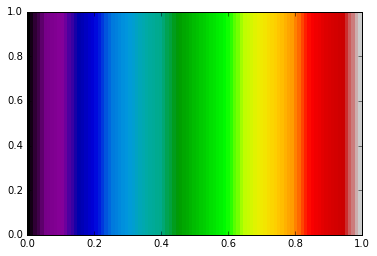

In [56]:
Tn = np.linspace(0,1,100)
T = np.linspace(-15,120,100)
surf = (np.ones((len(Tn),len(Tn)))*Tn[:,None]).T
plt.pcolormesh(Tn,Tn,surf, cmap=mpl.cm.nipy_spectral)

In [127]:
Tdict = {120:1.,
         110:0.95,
         100:0.85,
         90:0.8,
         80:0.7,
         70:0.65,
         60:0.5,
         50:0.38,
         40:0.25,
         30:0.18,
         20:0.1,
         10:0.05,
         0:0.0}

r,g,b = [],[],[]
rtup,gtup,btup = [],[],[]
Tsorted = [(k,v) for k,v in Tdict.items()]
Tsorted.sort()
for t,v in Tsorted:
    tmp = mpl.cm.nipy_spectral(v)
    r = tmp[0]
    g = tmp[1]
    b = tmp[2]
    tn = t/120
    print(v,t,tn)
    rtup.append((tn,r,r))
    gtup.append((tn,g,g))
    btup.append((tn,b,b))
cdict = {'red':rtup,'green':gtup,'blue':btup}
tmap = mpl.colors.LinearSegmentedColormap('tempmap',cdict)



0.0 0 0.0
0.05 10 0.08333333333333333
0.1 20 0.16666666666666666
0.18 30 0.25
0.25 40 0.3333333333333333
0.38 50 0.4166666666666667
0.5 60 0.5
0.65 70 0.5833333333333334
0.7 80 0.6666666666666666
0.8 90 0.75
0.85 100 0.8333333333333334
0.95 110 0.9166666666666666
1.0 120 1.0


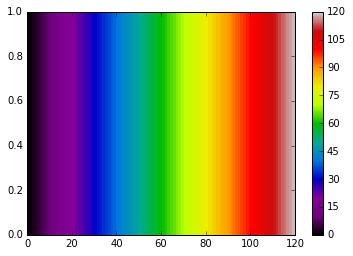

In [128]:
Tn = np.linspace(0,1,100)
T = np.linspace(0,120,100)
surf = (np.ones((len(Tn),len(Tn)))*T[:,None]).T
plt.pcolormesh(T,Tn,surf, vmin=0,vmax=120,cmap=tmap)
plt.colorbar()